<a href="https://colab.research.google.com/github/drrmh/Anamoly/blob/main/ViSiL_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ViSiL: Fine-grained Spatio-Temporal Video Similarity Learning
This is a google colab that demonstrates the ViSiL functionalities step-by-step.

## Environment preperation
Install Tensorflow and download ViSiL from the GitHub


In [ ]:
!pip install tensorflow-gpu==1.15

In [ ]:
!git clone https://github.com/MKLab-ITI/visil
%cd visil
!pip install -r requirements.txt
!wget http://ndd.iti.gr/visil/ckpt.zip
!unzip ckpt.zip
!rm ckpt.zip

Import the necessary classes and functions

In [22]:
import imageio
import seaborn as sns
import matplotlib.pyplot as plt

from IPython import display
from model.visil import ViSiL
from datasets import load_video

ModuleNotFoundError: ignored

## Run model given a video pair

First, you have to initialize ViSiL model and load pre-trained weights

In [ ]:
model = ViSiL('ckpt/resnet/')

### Video loading
Load the two videos from the video files

In [ ]:
video1 = load_video("examples/video1.gif")
video2 = load_video("examples/video2.gif")

In [ ]:
print('video1 shape:', video1.shape)
print('video2 shape:', video2.shape)

video1 shape: (60, 256, 256, 3)
video2 shape: (60, 256, 256, 3)


Display videos

In [ ]:
with open('examples/video1.gif','rb') as f:
    display.display(display.Image(data=f.read()))

In [ ]:
with open('examples/video2.gif','rb') as f:
    display.display(display.Image(data=f.read()))

### Feature extraction
Extract features for the two videos by proving the videos to the network.

In [ ]:
video1_features = model.extract_features(video1, batch_sz=32)
video2_features = model.extract_features(video2, batch_sz=32)

In [ ]:
print('video1 features shape:', video1_features.shape)
print('video2 features shape:', video2_features.shape)

video1 features shape: (60, 9, 3840)
video2 features shape: (60, 9, 3840)


### Similarity calculation
Once you have extracted the features for the two videos, you can calculate the similarity between them based on the ViSiL network.

In [ ]:
similarity = model.calculate_video_similarity(video1_features, video2_features)
print('similarity score:', similarity)

similarity score: 0.64358026


### Plot the matrices
First, define a visualization function

In [ ]:
def visualize_matrix(sim_matrix, title, step=1):
  # create a heatmap based on the input similarity matrix
  ax = sns.heatmap(sim_matrix, cmap="jet", cbar=False, square=True)

  # set axes ticks
  ax.set_xticklabels(map(lambda s: "%02d:%02d" % divmod(s*step, 60), ax.get_xticks()-0.5))
  for ind, label in enumerate(ax.get_xticklabels()):
      label.set_visible(ind % 3 == 0)
  ax.set_yticklabels(map(lambda s: "%02d:%02d" % divmod(s*step, 60), ax.get_yticks()-0.5))
  for ind, label in enumerate(ax.get_yticklabels()):
      label.set_visible(ind % 2 == 0)

  plt.xticks(rotation=45)
  plt.yticks(rotation=0)
  plt.title(title)

  plt.show()

Calculate and plot the frame-to-frame similarity matrix. It is evident that there is a lot of noise and temporal patterns are not easily recognizable.

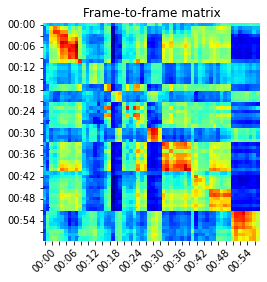

In [ ]:
sim_matrix = model.calculate_f2f_matrix(video1_features, video2_features)
visualize_matrix(sim_matrix, 'Frame-to-frame matrix')

Calculate and plot the ViSiL output. The temporal alignment between the two videos is much more distinct in the network's output than in the frame-to-frame similarity matrix, and a lot of noise has been suppressed.

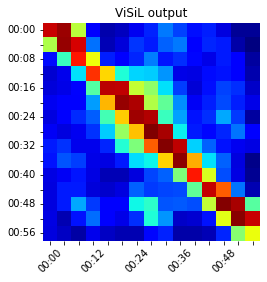

In [ ]:
sim_matrix = model.calculate_visil_output(video1_features, video2_features)
visualize_matrix(sim_matrix, 'ViSiL output', step=4)